In [1]:
# Setting New Working Directory.

# First Import Python's os Module.
import os

# Print Current Working Directory.
print("Current Working Directory is:",os.getcwd())

# Change the Current Working Directory using os.chdir(path)
os.chdir("C:/Users/gabaj/Downloads")
print("New Working Directory is:",os.getcwd())

Current Working Directory is: C:\Users\gabaj\2 Capstone
New Working Directory is: C:\Users\gabaj\Downloads


In [2]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Installing mord using pip (Python Package Index) in current Jupyter kernel
import sys
!{sys.executable} -m pip install mord

In [4]:
## Import required packages

%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

# Admission

## Data Import & Preparation
Load the `AD.csv` dataset. And drop column 'Serial_Number'

In [5]:
Ad_df = pd.read_csv('Admission_Predict.csv')
Ad_df.drop(columns=['Serial_Number'], inplace=True)
Ad_df.columns = [c.replace(' ', '_') for c in Ad_df.columns]

y = Ad_df['Admissiondone']
X = Ad_df.drop(columns=['Admissiondone'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Single Variable Model

In [6]:
predictors = ['GREScore']
outcome = 'Admissiondone'

y = Ad_df[outcome]
X = Ad_df[predictors]

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coefficient': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -78.29260011003569
             GREScore
coefficient  0.241032

AIC 149.71159473674686


# Full Model

In [7]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
Ad_df = pd.read_csv('Admission_Predict.csv')
Ad_df.drop(columns=['Serial_Number'], inplace=True)
Ad_df.columns = [c.replace(' ', '_') for c in Ad_df.columns]

y = Ad_df['Admissiondone']
X = Ad_df.drop(columns=['Admissiondone'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -57.105560363001246
       GREScore  TOEFLScore  UniversityRating       SOP      LOR_      CGPA  \
coeff -0.211529   -0.067473          0.991623 -0.878771 -0.793173  4.250272   

       Research  Admissionchance  
coeff  0.484486       120.730288  

AIC -337.967479811917


## Compute Probabilities

In [8]:
import logging
if __name__=="__main__" :   
    plt.tight_layout()
    plt.show()
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.ERROR)

try:
    logit_reg_pred = logit_reg.predict(valid_X)
    logit_reg_proba = logit_reg.predict_proba(valid_X)
    logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

    
    # display four different cases
    interestingCases = [322, 314, 315, 321]
    print(logit_result.loc[interestingCases])
except KeyError as e:
    logger.error(e)
except NameError as n:
    logger.error(n)
else: 
    pass
__name__ = "__main__"

<Figure size 432x288 with 0 Axes>

ERROR:__main__:"Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([315], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"


## Confusion Matrix

In [9]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9875)

       Prediction
Actual   0   1
     0 167   1
     1   2  70
Confusion Matrix (Accuracy 0.9938)

       Prediction
Actual   0   1
     0 114   1
     1   0  45


## Gains & Lift Chart

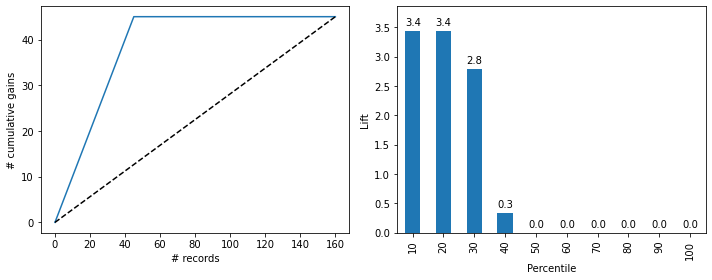

In [10]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()